## Exploratory data analysis with Scikit-learn

In this notebook, I will explore a dataset using various scikit-learn tools, before applying machine learning models. 

I will use the "utility.dat.txt" file from the
<a href=" http://jse.amstat.org/jse_data_archive.htm"> Journal of Statistics education</a> datasets, containing energy consumption of a residential house. The energy consumption is linked to the
outdoor temperature and size of the house. For a home of a fixed size, we can predict variations in energy consumption with outside temperature over time. If we add new rooms to the house, we expect that electricity usage will increase. We can also explore relations between different variables in this data set and predict the energy demand for the following months. 

#### Importing data and exploring column types

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
file = '../data/utility.dat.txt'

column_names = ['date', 'day_in_month', 'temp_month', 'gas_usage_day','terms_month', 
              'billing_days_gc', 'kilowatt_total', 'kilowatt_day', 'billing_days_ec', 
              'kwh', 'days_heating', 'days_cooling', 'nroom']

#dataframe with 12 columns and date as an index column
df = pd.read_csv(file, header=None, 
               sep='\s+',
               names=column_names,
               index_col='date')                 

In [3]:
#converting Fahrenheith to Celsius 
df['temp_month'] = ((df['temp_month']-32)/1.8).round(decimals=2)

df.head(5)

,day_in_month,temp_month,gas_usage_day,terms_month,billing_days_gc,kilowatt_total,kilowatt_day,billing_days_ec,kwh,days_heating,days_cooling,nroom
date,,,,,,,,,,,,
Sep-90,30,16.67,0.8,24,30,432,14.4,30,0,128,48,0
Oct-90,31,13.33,2.1,61,29,469,15.6,30,1,299,26,0
Nov-90,30,7.22,4.9,159,32,339,10.6,32,0,603,3,0
Dec-90,31,2.78,6.1,185,30,408,14.1,29,1,866,0,0
Jan-91,31,-2.78,8.3,275,33,658,21.9,30,0,1171,0,0


In [4]:
df.dtypes

day_in_month         int64
temp_month         float64
gas_usage_day       object
terms_month         object
billing_days_gc     object
kilowatt_total       int64
kilowatt_day       float64
billing_days_ec      int64
kwh                  int64
days_heating         int64
days_cooling         int64
nroom                int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, Sep-90 to May-97
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   day_in_month     81 non-null     int64  
 1   temp_month       81 non-null     float64
 2   gas_usage_day    81 non-null     object 
 3   terms_month      81 non-null     object 
 4   billing_days_gc  81 non-null     object 
 5   kilowatt_total   81 non-null     int64  
 6   kilowatt_day     81 non-null     float64
 7   billing_days_ec  81 non-null     int64  
 8   kwh              81 non-null     int64  
 9   days_heating     81 non-null     int64  
 10  days_cooling     81 non-null     int64  
 11  nroom            81 non-null     int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 8.2+ KB


This is a relatively small dataset with only 81 rows. 

First we will explore each column and see if there are any columns we can drop. There are 81 rows and 12 columns in the input data table:
First column is an index column with dates:

<ul>
      <li> date -- Observation month in the format: "mmm-yy" </li>
      <li> day_in_month -- number of days for each month </li>
      <li> temp_month -- mean monthly temperature in degrees Fahrenheith (converted to Celsius) </li>
      <li> gas_usage_day -- mean natural gas usage per day for the month in therms (thm). Therm is unit of heat energy, 1 thm=105.5 MJ =29.3 kWh. </li>
      <li> terms_month -- Total gas usage for the month in therms (terms_month= day_in_month * gas_usage_day) </li>
      <li> billing_days_gc --  Days in the gas company billing cycle for the month </li>          
      <li> kilowatt_total -- Total kilowatt hours (kWh) consumed in the month (kilowatt_total= kilowatt_day * day_in_month)</li>
      <li> kilowatt_day -- Mean kilowatt hours per day for the month </li>    
      <li> kwh -- Indicator variable showing the reading method for the gas usage (0 -- means month-end meter reading and 1 means estimated reading) </li>
    <li>  days_heating -- Total heating degree days for the month</li>
    <li>  days_cooling -- Total cooling degree days for the month</li>
    <li>  nroom -- Indicator variable for the new room (0 - means data are collected before new room, 1 - means data are collected after a new room was added</li>
         
</ul>

#### Relationship between columns

Text(0, 0.5, 'Number of Kilowatt hours/month')

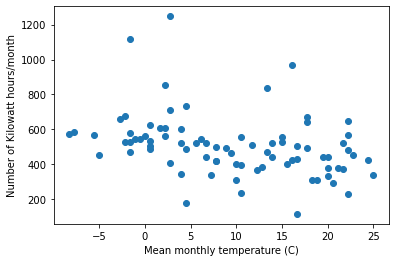

In [6]:
#plotting energy consumption v.s. temperature 
plt.scatter(df['temp_month'], df['kilowatt_total'])
plt.xlabel('Mean monthly temperature (C)')
plt.ylabel('Number of Kilowatt hours/month')

Apart from a few points, most measurements indicate that energy consumption decreases with the decrease in temperatures. We can also check if there is a correlation between different columns by using the scatter_matrix command. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000221B5882C08>,
      dtype=object)

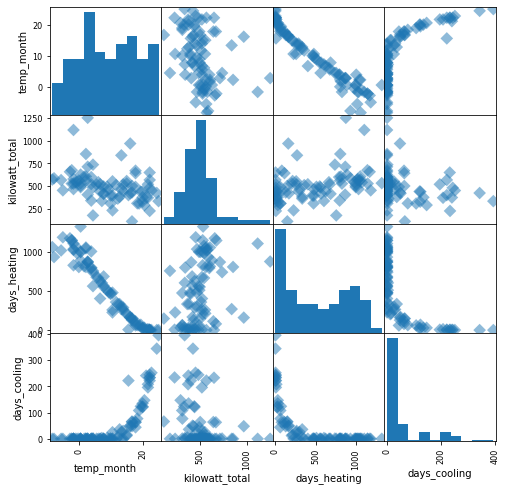

In [7]:
df1 = df[['temp_month', 'kilowatt_total', 'days_heating', 'days_cooling']]

pd.plotting.scatter_matrix(df1, figsize=[8,8], s=80, marker='D')

From the scatter_matrix plot, we can again notice that the monthly temperature is highly correlated, with the number of days when the heating or cooling was applied The total use of energy in kilowatts is also somewhat correlated to the monthly temperature.

#### Exploring distributions of features using histograms and bar plots 

Text(0, 0.5, 'count')

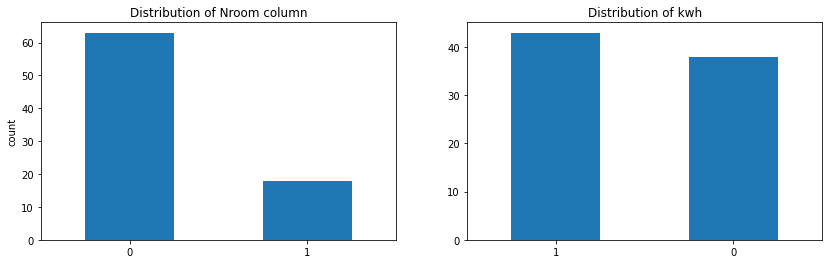

In [8]:
#checking categorical variables nroom and kwh

df_nroom = df.nroom.value_counts()
df_kwh = df.kwh.value_counts()

fig, ax = plt.subplots(figsize = (14, 4), ncols = 2)
ax1 = df_nroom.plot.bar(ax=ax[0], rot=0)
ax2 = df_kwh.plot.bar(ax=ax[1], rot=0)
ax1.set_title('Distribution of Nroom column')
ax2.set_title('Distribution of kwh')
ax1.set_ylabel('count')

From the barplot above, we can see that the Nroom column is not balanced, as 76% of data are collected before a new room was added, and only 24% is collected after the new room was added. 
If we leave the dataset as it is, this problem will reflect in the larger number of predictions with 0 values then with 1. One of the ways of solving the problem is by resampling data. 